### Ex 6.1

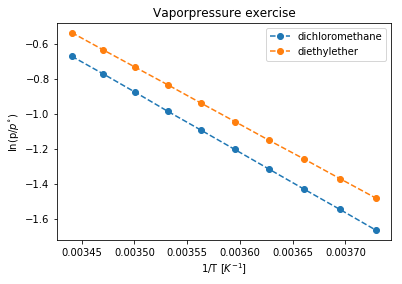

In [19]:
import numpy as np
import matplotlib.pyplot as plt

data1 = np.genfromtxt("data/dichloromethane_vaporpressure.csv",skip_header=1,delimiter=",")
data2 = np.genfromtxt("data/diethylether_vaporpressure.csv",skip_header=1,delimiter=",")

data1_T = data1[:,0] + 273.15 # Converts to kelvin
data1_p = (data1[:,1] + 1075)/1000 # Adding the reference value and converting to bar

data2_T = data2[:,0] + 273.15
data2_p = (data2[:,1] + 1075)/1000

plt.plot(1/data1_T,np.log(data1_p),linestyle='--',marker='o',label='dichloromethane')
plt.plot(1/data2_T,np.log(data2_p),linestyle='--',marker='o',label='diethylether')
plt.legend()
plt.title("Vaporpressure exercise")
plt.xlabel("1/T [$K^{-1}$]")
plt.ylabel("ln(p/$p^{\circ}$)")
plt.show()

In [6]:
data1

array([[  17.5, -564. ],
       [  15. , -613. ],
       [  12.5, -659. ],
       [  10. , -702. ],
       [   7.5, -740. ],
       [   5. , -775. ],
       [   2.5, -807. ],
       [   0. , -836. ],
       [  -2.5, -862. ],
       [  -5. , -886. ]])